In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check torch version
torch.__version__

'2.4.1'

## Data Preparing and Loading

In [3]:
# Create *known* parameters

weight = 0.7
bias = 0.3

# Create 
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

print(f"X : {X[:10]}")
print(f"y : {y[:10]}")
print(f'Shape of X: {X.size()}')
print(f'Shape of y: {y.size()}')
print(f'Length of X: {len(X)}')
print(f'Length of y: {len(y)}')

X : tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
y : tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])
Shape of X: torch.Size([50, 1])
Shape of y: torch.Size([50, 1])
Length of X: 50
Length of y: 50


## Spliting Data into Training and Testing 

In [4]:
# Create a train/test split

train_split = int(0.7 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(f"X train: {X_train[:5]}")
print(f"y train: {y_train[:5]}")
print(f"X test: {X_test[:5]}")
print(f"y test: {y_test[:5]}")

X train: tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800]])
y train: tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560]])
X test: tensor([[0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800]])
y test: tensor([[0.7900],
        [0.8040],
        [0.8180],
        [0.8320],
        [0.8460]])


## Visualize Data  ---> Matplotlib

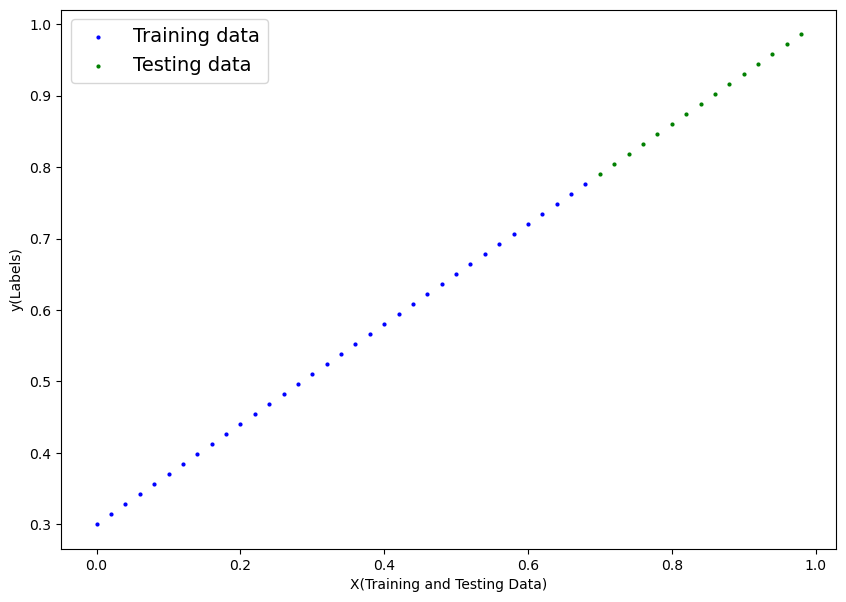

In [5]:
# Defining function for plotting

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # Plot the predictions in red
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Labling axes
    plt.xlabel("X(Training and Testing Data)")
    plt.ylabel("y(Labels)")

    # Show the legend
    plt.legend(prop={'size': 14})


# Plotting the data by executing the function
plot_predictions()

## Linear Regression Model

In [6]:
# Create a linear regression model

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,
                                               requires_grad=True,
                                               dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        
    # Forward method to define the computation in the model
    # Defines how input data is transformed to output data
    def forward(self, X: torch.Tensor) -> torch.Tensor:
        return self.weight * X + self.bias   # Linear regression formula

* X: torch.Tensor ==> This specifies that the input X is expected to be a PyTorch tensor. The colon (:) is used for type annotation, indicating the expected data type of X.

* -> torch.Tensor ==> This is a return type annotation, indicating that the function will return a PyTorch tensor.

* Parameter: This is a class in PyTorch that wraps a tensor and marks it as a learnable parameter. Parameters are automatically tracked by PyTorch and are updated during training (e.g., via gradient descent).

* torch.randn(1, requires_grad=True, dtype=torch.float)
This is the tensor being wrapped by nn.Parameter. Let’s break it down further:
torch.randn(1)

    torch: Refers to the PyTorch library.

    randn: This is a function that generates a tensor with random values drawn from a standard normal distribution (mean = 0, standard deviation = 1).

    (1): This specifies the shape of the tensor. Here, 1 means the tensor will have a single value (a scalar).

* ***Any subclass of nn.Module needs to override forward() 
(This define the forward computation of the model)***

In [7]:
# Instantiate the model

#Create a random seed
torch.manual_seed(69)

# Creating the instance of the model
model_0 = LinearRegressionModel()

# Check the model parameters with name (Using state_dict method)
model_0.state_dict()

OrderedDict([('weight', tensor([-0.5259])), ('bias', tensor([-2.6043]))])

*** Making predictions with model without parameter optimizations(Using initial randomly initialized parameters)

In [8]:
# Make predictions with model

with torch.inference_mode():   # Disabling all useful things in training(ex:-gradient calculation) using inference_mode
    y_preds = model_0(X_test)

print(f"Predictions: {y_preds}")
print(f"Actual values: {y_test}")

Predictions: tensor([[-2.9724],
        [-2.9829],
        [-2.9934],
        [-3.0039],
        [-3.0145],
        [-3.0250],
        [-3.0355],
        [-3.0460],
        [-3.0565],
        [-3.0671],
        [-3.0776],
        [-3.0881],
        [-3.0986],
        [-3.1091],
        [-3.1196]])
Actual values: tensor([[0.7900],
        [0.8040],
        [0.8180],
        [0.8320],
        [0.8460],
        [0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


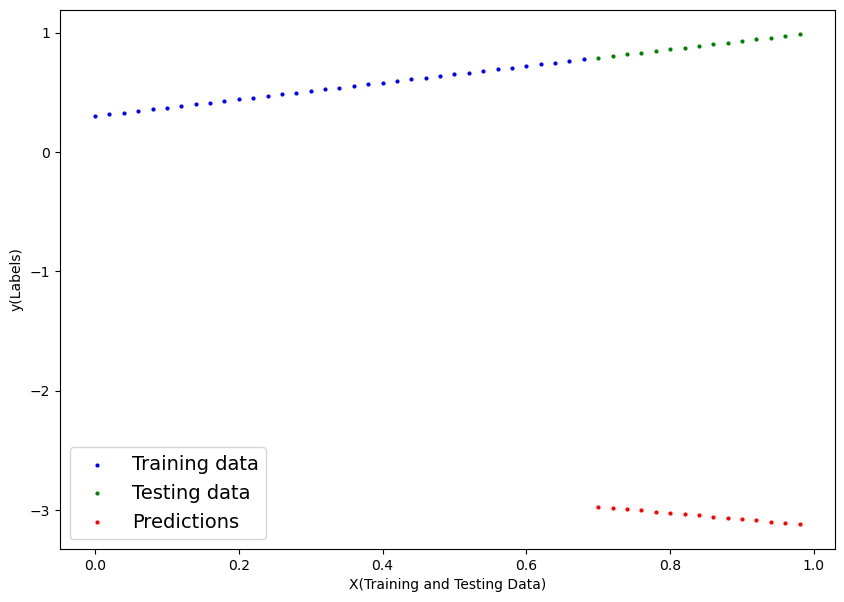

In [9]:
# Plot graph with predictions

plot_predictions(predictions=y_preds)

# Train model

* Loss function :- A function to measure how wrong model's predictions are to the ideal outputs, lower is better.
* Optimizer :- Takes into account the loss of a model and adjusts the model's parameters(e.g:- weight & bias) to improve the loss function.

***Inside the optimizer often need to set two parameters.***
* params - the model parameters to optimize
* lr(learning rate) - a hyperparameter that defines how big/small the optimizer changes the parameters with each step(a small lr results in small changes, a large lr results in large changes)


In [10]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (eg:- Stochastic Gradient Descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.001)    #lr - Learning Rate

### Building a training loop (and a testing loop) in PyTorch

***Things need in a training loop:***
0. Loop through the data and do...
1. ***Forward Propagation(Forward Pass)*** - This involves data moving through model's 'forward()' method to make predictions on data.***This will perform the 'forward()' method located within model object.***
2. Calculate the loss (Compare forward propagation predictions to ground truth labels)
3. Optimizer zero grad
4. ***Backpropagation(Loss Backward)*** - Move backwards through the network to calculate the gradient of each of the parameters of model with respect to the loss.
5. Optimizer step - Use the optimizer to adjust model's parameters to minimize the loss (***Gradient Descent***)

### ***epoch*** - One complete pass through the entire training dataset by the model.

### ***epochs*** - Pass the entire data through the model for a number of ***"epochs"***.
 
### Modes for models in PyTorch
* ***model.train()*** - train mode sets all parameters that require gradients to optimize
* ***model.eval()*** - turns off gradient tracking

In [11]:
# An epoch is one loop through the data.(Hyperparameter)
epochs = 2700

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# Loop through the data
for epoch in range(epochs):
    # Set the model to training mode (This is the default state of a model)
    model_0.train() # Train mode activates

    # 1. Forward propagation - This will perform forward() method located within model object
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero the gradient of the optimizer (they accumulate by default)
    optimizer.zero_grad()    # Reset gradients from previous step(Clear/Zero)

    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    # Compute the gradient of every parameter with requires_grad=True 
    loss.backward()

    # 5. Step the optimizer (With respect to the gradient calculated by loss.backward())
    optimizer.step()        # Update parameters

### Testing
    # Turn off different settings in the model not needed for evaluation/testing
    model_0.eval() # Evaluation mode activates

    with torch.inference_mode():
        # 1. Do forward propagation
        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    # Print out outputs
    if epoch % 10 == 0:
        # Append values to the lists for future analysis
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        # Print the values
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 3.3210716247558594 | Test loss: 3.932731866836548
Epoch: 10 | Loss: 3.3099167346954346 | Test loss: 3.9198760986328125
Epoch: 20 | Loss: 3.2987613677978516 | Test loss: 3.9070210456848145
Epoch: 30 | Loss: 3.2876062393188477 | Test loss: 3.8941659927368164
Epoch: 40 | Loss: 3.2764508724212646 | Test loss: 3.8813107013702393
Epoch: 50 | Loss: 3.2652957439422607 | Test loss: 3.8684561252593994
Epoch: 60 | Loss: 3.2541403770446777 | Test loss: 3.8556010723114014
Epoch: 70 | Loss: 3.242985248565674 | Test loss: 3.842745304107666
Epoch: 80 | Loss: 3.23183012008667 | Test loss: 3.829890489578247
Epoch: 90 | Loss: 3.220674753189087 | Test loss: 3.81703519821167
Epoch: 100 | Loss: 3.209519386291504 | Test loss: 3.8041791915893555
Epoch: 110 | Loss: 3.198364019393921 | Test loss: 3.7913241386413574
Epoch: 120 | Loss: 3.187208652496338 | Test loss: 3.778468608856201
Epoch: 130 | Loss: 3.176053524017334 | Test loss: 3.765613555908203
Epoch: 140 | Loss: 3.164897918701172 | Test lo

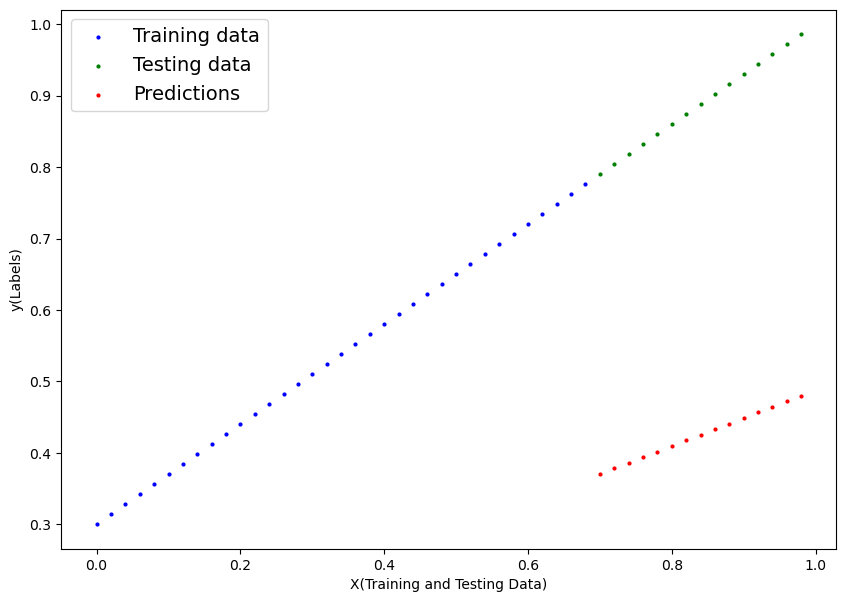

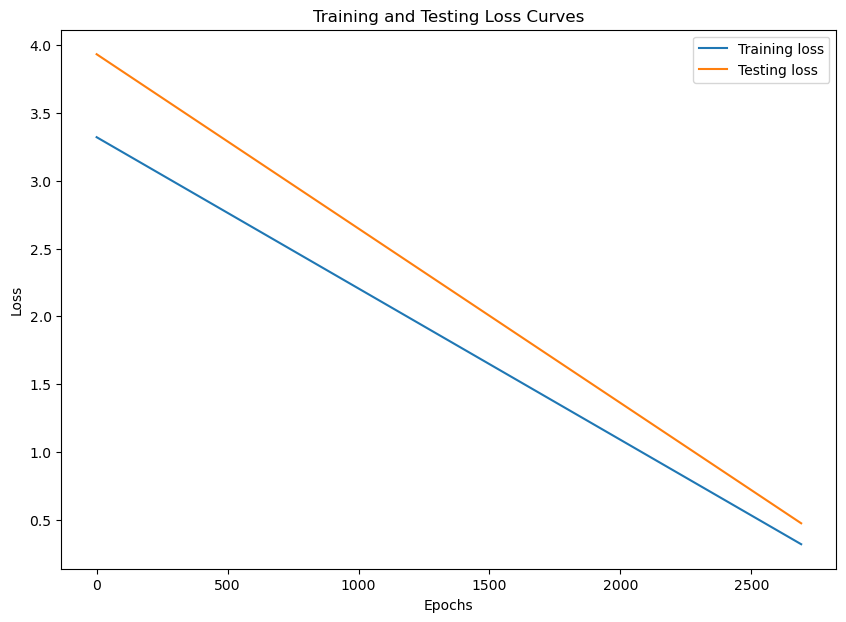

In [12]:
# Plot graph with new predictions
plot_predictions(predictions=test_pred)

# Plot the loss values over the epochs
plt.figure(figsize=(10, 7))
plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label="Training loss")
plt.plot(epoch_count, test_loss_values, label="Testing loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Testing Loss Curves")
plt.legend()

## Saving and Loading Model in PyTorch
#### There are three main methods for saving and loading models in PyTorch
1. **torch.save()** - save a PyTorch object in Python's pickle format
2. **torch.load()** - load a saved PyTorch object
3. **torch.nn.Module.load_state_dict()** - load a model's saved state dictionary

In [13]:
# Saving the PyTorch model
from pathlib import Path

# 1. Creaate models directory
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create the path to save the model
MODEL_NAME = "01_linear_regression_model.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# 3. Save the model state dict
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

### Loading a PyTorch Model
Since we saved model's ***state_dict()*** rather than entire model, create a new instance of model class and load the saved ***state_dict()*** into that.

In [14]:
# Instantiate new instance of model to load saved state dict
loaded_model = LinearRegressionModel()

# Load the saved state_dict
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

/tmp/ipykernel_4228/4130612568.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [15]:
loaded_model.state_dict()

OrderedDict([('weight', tensor([0.3921])), ('bias', tensor([0.0957]))])

In [17]:
# Make predictions with loaded model

loaded_model.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test)

loaded_model_preds == test_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])